# Projection Matrix Coding Challenge

Recall, again, that an $n\times m$ matrix is exactly $n$ samples of $m$ dimensional data. When $m$ is 1, 2, or 3, we can draw a picture of it. $m > 3$ suffers from the curse of dimensionality and also cannot be visualized without some careful manipulations.

$x = \begin{pmatrix} 0 & 1 & 4 & 1 \\ 1 & 2 & 2 & 1 \\ 4 & 4 & 0 & 1 \end{pmatrix}$

The above $3 \times 4$ matrix can't be directly visualized. Each of the three points has four dimensions! Returning to linear algebra, a $l \times m$ matrix times a $m \times n$ matrix produces a $l \times n$ matrix. 

$\left( l \times m\right) \times \left(m \times n\right) = \left(l \times n\right)$

This kind of matrix multiplication is called a "Projection", projecting each of the $m$ dimensional points onto an $l$ dimensional vector.

$M = \begin{pmatrix} 1 & 0 \\ 0 & 1 \\ 0 & 0.5 \\ 0.5 & 0 \end{pmatrix}$

$xM = \begin{pmatrix} 0 & 1 & 4 & 1 \\ 1 & 2 & 2 & 1 \\ 4 & 4 & 0 & 1 \end{pmatrix} \begin{pmatrix} 1 & 0 \\ 0 & 1 \\ 0 & 0.5 \\ 0.5 & 0 \end{pmatrix} = \begin{pmatrix} 0.5 & 1 + 2 \\ 1 + 0.5 & 2 + 1 \\ 4 + 0.5 & 4 \end{pmatrix} = \begin{pmatrix} 0.5 & 3 \\ 1.5 & 3 \\ 4.5 & 4 \end{pmatrix}$

$x$ is now a $3 x 2$ matrix.

Below, three sets of points are plotted in a 3d scatter plot.


[[-8. -7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.]
 [-0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5,0.92,'Plotted as one continuous dataset')

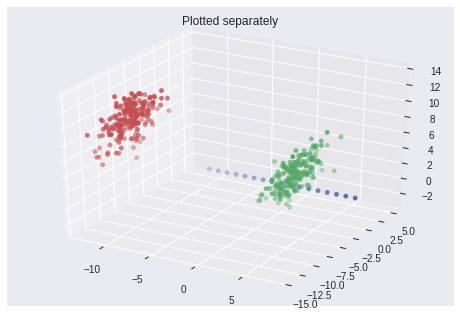

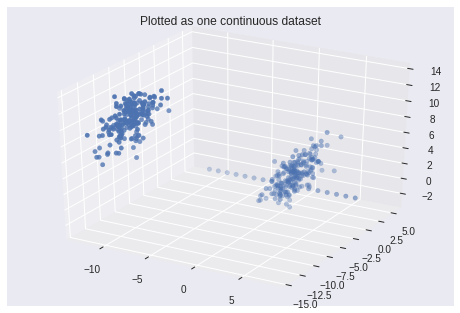

In [1]:
# Dimensional Projection Coding Challenge

# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x = np.linspace(-8,8,17)
Z = np.repeat(np.array([1,0,0]).reshape(1,3),17,axis=0).T * x
print (Z)
points1 = np.random.multivariate_normal([1,1,1],[[1,0.1,2],[0.1,1,1.5],[1,2,1]],200)
points2 = np.random.multivariate_normal([-10,-10,10],[[1,0.1,2],[0.1,1,1.5],[1,2,1]],200)

zx, zy, zz = Z
p1x, p1y, p1z = points1.T

p2x, p2y, p2z = points2.T

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(zx,zy,zz)
ax.scatter(p1x,p1y,p1z)
ax.scatter(p2x,p2y,p2z)
ax.set_title('Plotted separately')

all_points = np.concatenate([Z.T,points1,points2],axis=0)
xa, ya, za = all_points.T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xa, ya, za)
ax.set_title('Plotted as one continuous dataset')

# Multiply by a matrix and plot in 2d

Create a 2d matrix `projection_matrix`, multiply it with the points above, and chart the result.

1. Remember that numpy will perform matrix multiplication for you. You don't need to write those routines.
2. Remember that the orientation $m \times n$ of your matrices is important and requires constant attention.

After you've plotted the points in $2d$, try modifying your projection matrix to get more interesting results. The 3d points above can be projected onto any $2d$ plane, which will greatly affect their appearance and separability.

* Remember that any $2 \times 2$ matrix $M$ can be a composition of other matrices: $M = TRS$
* Try applying rotation, translation, and scale to your projection matrix to change the appearance of your new $2d$ plot.

(417, 2)


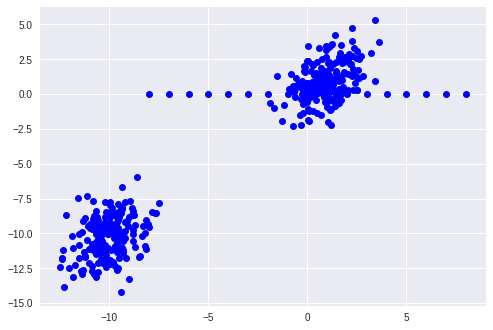

In [2]:
# Your work goes here|
projection_matrix = [[1,0],[0,1],[0,0]]

#Rotation Matrix
def rotation_matrix(theta):
  return ([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])

#scaling Matrix
S = [[1,0],[0,1]]

projection_matrix = np.matmul(projection_matrix,rotation_matrix(0))

# multiply new projection_matrix with all_points
result = np.matmul(all_points,projection_matrix)
print(result.shape)

#plot the graph
x,y = result.T
import matplotlib.pyplot as plt
plt.plot(x,y,'ob')